# HiPy: Python for Scientists
### An Introduction to Jupyter Notebook and Matplotlib

Welcome to HiPy! If you're reading this during one of our Hive events then we have a few simple rules:
  - Don't work in isolation. Find a partner or team and work together.
  - If you get stuck then turn to the nearest person and ask for help. They won't bite!
  - Have fun and lots of interesting conversations.
  
The objective of this notebook is to provide an introduction Jupyter Notebook and Matplotlib. Be sure to checkout our other notebooks in the Python for Scientists Resources section at [hipy.uk](http://hipy.uk) You're not going to learn everything in the two or three hours that you're with us but hopefully we'll be able to showcase some really useful aspects of Python that will be of benefit to you and your research/studies.

The first bit of magic that we have to perform is to run the code in the cell below. This loads a tonn of stuff into the background of our notebook including NumPy and Matplotlib. This means that we dont have to preceed our functions with np. or plt.

In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Basic Plotting


### Example 1.1: Basics

This example is based on a great introduction to plotting using matplotlib which can be found here:
  - [http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)

OK. Lets start. The cell below shows the three key elements to any basic 2D plot in matplotlib:
  - A list of x values
  - A list of y values (the same length as the x list)
  - A command to plot that takes lists x and y as arguments)

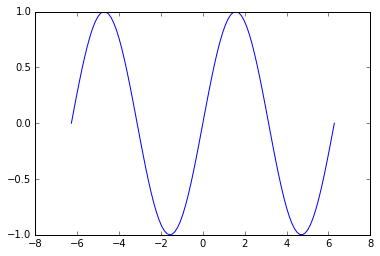

In [2]:
x = linspace(-2*pi, 2*pi, 100) #generates list of 100 data points in range -2pi to 2pi
y = sin(x) #generates a list of sin(x) values from x
plot(x, y) #generates a plot of x vs y


What! No axis labels? No title? That is unforgivable, lets remedy this ...

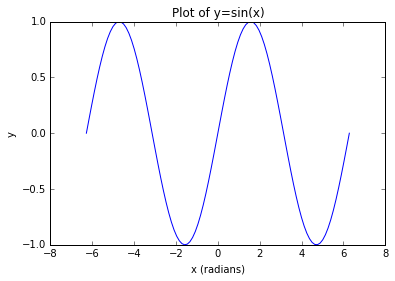

In [3]:
x = linspace(-2*pi, 2*pi, 100) #generates list of 100 data points in range -2pi to 2pi
y = sin(x) #generates a list of sin(x) values from x
plot(x, y) #generates a plot of x vs y

xlabel('x (radians)') #sets x label
ylabel('y') #sets the y label
title('Plot of y=sin(x)') # sets the title (obviously)


Phew, that's better.

### Excercise 1.1a
  - Add a plot of y = cos(x) to the plot
  - Add a legend to the plot that labels both sin(x) and cos(x) curves

In [4]:
# Write your solution here

### Example 1.2: Using subplots()

Using the subplots() method allows us to create a grid of axes and gives a lot more flexibility to format our plots and re-use them.

This example is based on that provided by:
  - [http://matplotlib.org/examples/pylab_examples/subplots_demo.html](http://matplotlib.org/examples/pylab_examples/subplots_demo.html)



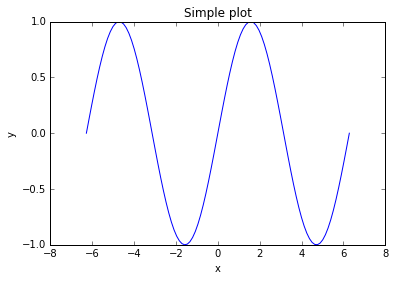

In [5]:
fig, ax = subplots()
ax.plot(x, y)
ax.set_title('Simple plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

So how is this different to what we have done before? Well, we can now simply call "fig" in a cell to reproduce our plot at will ...

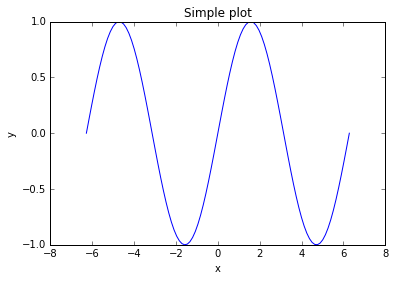

In [6]:
fig

You can also save your plot to an image file ...

In [7]:
fig.savefig('simplePlot.png') #saves the file in the same directory as your .ipynb file

subplots() also allows you to generate multiple plots within your figure ...

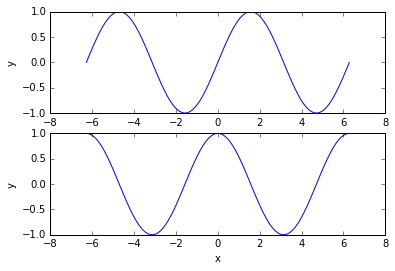

In [8]:
fig, (ax1, ax2) = subplots(2,1) #subplots(rows, columns)
ax1.plot(x, y)
ax1.set_ylabel('y')
ax2.plot(x, cos(x))
ax2.set_xlabel('x')
ax2.set_ylabel('y')

In this situation where you know your x-axes are the same it might be nice to share them (i.e. only show the one at the bottom of the second plot). This is really easy ...

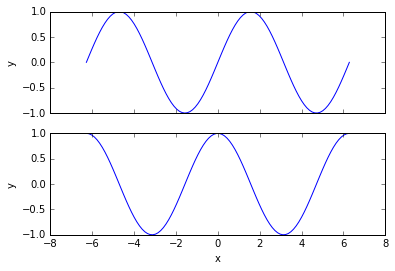

In [9]:
fig, (ax1, ax2) = subplots(2,1, sharex=True) #share x-axis
ax1.plot(x, y)
ax1.set_ylabel('y')
ax2.plot(x, cos(x))
ax2.set_xlabel('x')
ax2.set_ylabel('y')

## Exercise 1.2a
  - add an extra subplot of y = tan(x) to the figure above
  - make the figure bigger so that it fills the cell
  - change the font size of the axis labels so that they are easier to read
  - change the font size of the tick labels too!

In [10]:
# Write your solution here

## Exercise 1.2b
  - add an additional line to each subplot (e.g. y = (sin(x)**2))
  - create a legend for each subplot and position it in the bottom left hand corner
  

In [11]:
# Write your solution here

# 2. Reading Data

If you're a scientist or engineer then no doubt you are used to data ... lots of data. If you want to plot that data with Python then we first have to read it. The way you go about this depends a lot on how the data is stored and formatted e.g. is it in columns, is a in a .txt or .csv file? Here are a few basic examples on how to read and plot some simple data.

## Example 2.1: basicData.csv

If you take a look at the github respository that this notebook is stored in then you will also find a file called 'basicData.csv'. Download this file and put it in the same repository as your working notebook (note: if you are awesome you will have used Git to clone the repo to a local folder on your laptop so you won't need to do this).

There are loads of ways that we could read this file with Python. My favourite way is as follows:

In [12]:
with open('basicData.csv', 'r') as f: #opens the file as on object 'f', 'r' argument denotes read mode.
    print(f.read()) #spits out the entire contents of the file

0.8742493573359764,0.8984454872247875
0.9347834283458529,0.1185692139656731
0.3552538838826974,-0.5271505489899634
0.6711086063324345,0.37846699672418976
0.992089267808121,0.995832784659719
0.5638308316282392,-0.19675185221087227
0.13333568031363485,-1.0443527811123516
0.5137582239527181,-0.6097251652174991
0.2105473626844403,-1.0803183544557142
0.37956952808447686,-0.7732662970192039
0.0221870588491605,-1.8432987892536798
0.09375563265806297,-1.3706411577494704
0.5984487808383948,-0.13843242273243533
0.9935019206022323,-0.028254176133720388
0.076201853377724,-1.7708613728344005
0.6387799134233527,-0.13511023597814165
0.4502170616428369,-0.0223285556541043
0.8081806686744833,1.2995171108371186
0.7583440223862559,-0.06667467294239038
0.5160641774846834,0.2026862480999262
0.27040772557572856,-1.2056693625845392
0.49383371503123663,-0.3595445698153601
0.3989778642244468,0.05536913493335649
0.7687064359302935,0.9028184466505899
0.929788726885044,0.9088148660824498
0.5266236298540657,-0.313

You can see that this file contains two comma separated columns. But simple performing f.read() doesn't really help us much. In order for us to plot this data we want to put all of the values of one column in a list called 'x' and all the values in the second column into an array called 'y'. This requires a bit of jiggery pokery.

In [13]:
with open ('basicData.csv', 'r') as f:
    data = [] #create an empty list
    for line in f: #reads the file line by line
        data.append(line) #appends each line to the data list
    print(data)

['0.8742493573359764,0.8984454872247875\n', '0.9347834283458529,0.1185692139656731\n', '0.3552538838826974,-0.5271505489899634\n', '0.6711086063324345,0.37846699672418976\n', '0.992089267808121,0.995832784659719\n', '0.5638308316282392,-0.19675185221087227\n', '0.13333568031363485,-1.0443527811123516\n', '0.5137582239527181,-0.6097251652174991\n', '0.2105473626844403,-1.0803183544557142\n', '0.37956952808447686,-0.7732662970192039\n', '0.0221870588491605,-1.8432987892536798\n', '0.09375563265806297,-1.3706411577494704\n', '0.5984487808383948,-0.13843242273243533\n', '0.9935019206022323,-0.028254176133720388\n', '0.076201853377724,-1.7708613728344005\n', '0.6387799134233527,-0.13511023597814165\n', '0.4502170616428369,-0.0223285556541043\n', '0.8081806686744833,1.2995171108371186\n', '0.7583440223862559,-0.06667467294239038\n', '0.5160641774846834,0.2026862480999262\n', '0.27040772557572856,-1.2056693625845392\n', '0.49383371503123663,-0.3595445698153601\n', '0.3989778642244468,0.055369

Oh dear. This hasn't really helped. What a mess. Notice that the pairs of values from each line are accompanied by quotaion marks, indicating that they are stored as a big string, and by the characters '\n' which indicate the end of the line (we want to get rid of these. So how do we fix this? Well, before we append we need to do a bit of work ...

In [14]:
with open ('basicData.csv', 'r') as f:
    data = [] #create an empty list
    for line in f:
        newLine = line.strip('\n') #This strips out my unwanted '\n's
        newList = newLine.split(',') #This splits each line string on its comma into a list containing two elements
        floatList = [] #create a new empty list
        for item in newList:
            '''
            This loop looks at each element in newList,
            converts it from a string into a float
            and appends each new float to floatList
            '''
            floatList.append(float(item))
        data.append(floatList) #Then we append the data list with the new floatList
    print(data)

[[0.8742493573359764, 0.8984454872247875], [0.9347834283458529, 0.1185692139656731], [0.3552538838826974, -0.5271505489899634], [0.6711086063324345, 0.37846699672418976], [0.992089267808121, 0.995832784659719], [0.5638308316282392, -0.19675185221087227], [0.13333568031363485, -1.0443527811123516], [0.5137582239527181, -0.6097251652174991], [0.2105473626844403, -1.0803183544557142], [0.37956952808447686, -0.7732662970192039], [0.0221870588491605, -1.8432987892536798], [0.09375563265806297, -1.3706411577494704], [0.5984487808383948, -0.13843242273243533], [0.9935019206022323, -0.028254176133720388], [0.076201853377724, -1.7708613728344005], [0.6387799134233527, -0.13511023597814165], [0.4502170616428369, -0.0223285556541043], [0.8081806686744833, 1.2995171108371186], [0.7583440223862559, -0.06667467294239038], [0.5160641774846834, 0.2026862480999262], [0.27040772557572856, -1.2056693625845392], [0.49383371503123663, -0.3595445698153601], [0.3989778642244468, 0.05536913493335649], [0.7687

OK, this looks better, but my data stored in rows instead of columns, i.e. instead of 1000 list elements containing a pair of floats (one from each column) I want two elements (one x and one y), each containing 1000 values. This is easy to do using the transpose() method.

In [15]:
with open ('basicData.csv', 'r') as f:
    data = [] #create an empty list
    for line in f:
        data.append([float(i) for i in line.strip('\n').split(',')])
    data = transpose(data)
    print(data)

[[ 0.87424936  0.93478343  0.35525388  0.67110861  0.99208927  0.56383083
   0.13333568  0.51375822  0.21054736  0.37956953  0.02218706  0.09375563
   0.59844878  0.99350192  0.07620185  0.63877991  0.45021706  0.80818067
   0.75834402  0.51606418  0.27040773  0.49383372  0.39897786  0.76870644
   0.92978873  0.52662363  0.34368609  0.20048997  0.09983195  0.96650891
   0.0137737   0.49775261  0.31788369  0.44556314  0.23217349  0.56019653
   0.2931569   0.57836103  0.49019493  0.8201414   0.86558762  0.17078474
   0.70384807  0.04215819  0.2937288   0.68415892  0.73906559  0.5815534
   0.56487986  0.2501036   0.43695119  0.77364642  0.47729402  0.64400733
   0.24679439  0.80877328  0.67354416  0.77816988  0.08222866  0.145461
   0.31462259  0.86318626  0.82830251  0.71979258  0.45493087  0.43756734
   0.24163298  0.46478574  0.46511242  0.67380844  0.3847811   0.53222518
   0.03553581  0.76157423  0.92856921  0.697418    0.23821998  0.24074894
   0.02553053  0.17779678  0.22047947  0.

That's it. Note that I've also simplified my code somewhat by condensing the first 5 lines of my for loop to a single Pythonic line of code. Lovely. Now we are ready to plot, but first I'm going to create a function that I can call at any time to read similarly formatted .csv files.

In [16]:
def readFile(filename):
    '''
    Reads a .txt or .csv file containing comma sparated columns of data
    '''
    with open(filename) as f:
        headers = []
        data = []
        for line in f:
            try:
                data.append([float(i) for i in line.strip('\n').split(',')])
            except:
                headers = ([i for i in line.strip('\n').split(',')])
        return headers, transpose(data)

## Exercise 2.1a: Plot the data!
  - read the data from 'basicData.csv' and plot
  - make the plot look jazzy (i.e axis labels and titles)
  - perform a linear regression on the data (hint: Google "Python polyfit()")
  - add a line of best fit to your plot
  - save the figure!

In [17]:
# Write your solution here

## Excersise 2.1b: Stefan-Boltzmann
  - read the file 'sbData.csv' (see GitHub repo) and extract the file headers and data using readFile()
  - plot the data
  - Show that the data obeys the Stefan-Boltzmann law, $P=\sigma T^4$, where $P$ is the black body irradiance and $T$ is the temperature.
  - Estimate a value for $\sigma$ to two decimal places
  - Calculate the undertainty in $\sigma$ (hint: cov=True, [http://stackoverflow.com/questions/27757732/find-uncertainty-from-polyfit](http://stackoverflow.com/questions/27757732/find-uncertainty-from-polyfit))

In [18]:
# Write your solution here

# 3. Plotting 3D Graphs

Matplotlip is amazing for plotting three dimensional datasets. Let's practice using the real dataset "data3D.py" located in the GitHub repo that this notebook lives in. Download it to your local working directory and restart the Jupyter Kernel.

This time the data is actually saved with a .py which is really useful because now we can simply import it like any other Python module

In [19]:
import threed #it's that simple

In [21]:
threed.data #will dump the contents of the file so that you can read it.

[{'-15.0 -15.0': {'Rs': 18.181491196,
   'd': 582.0,
   'mob': 15.905328380039837,
   'ne': 3.708876427017723e+20,
   'rho': 0.0010581627876072,
   'wp': 1.161,
   'x': -15.0,
   'y': -15.0},
  '-15.0 -25.0': {'Rs': 29.4609458,
   'd': 542.0,
   'mob': 13.288394564690552,
   'ne': 2.9418396814090443e+20,
   'rho': 0.0015967832623599999,
   'wp': 1.034,
   'x': -15.0,
   'y': -25.0},
  '-15.0 -35.0': {'Rs': 54.148326936000004,
   'd': 465.0,
   'mob': 9.615477459240797,
   'ne': 2.5782714455445488e+20,
   'rho': 0.002517897202524,
   'wp': 0.968,
   'x': -15.0,
   'y': -35.0},
  '-15.0 -45.0': {'Rs': 135.027844644,
   'd': 421.0,
   'mob': 5.004390777570449,
   'ne': 2.19422339873691e+20,
   'rho': 0.0056846722595124,
   'wp': 0.893,
   'x': -15.0,
   'y': -45.0},
  '-15.0 -5.0': {'Rs': 12.803838123999999,
   'd': 687.0,
   'mob': 18.80827049393128,
   'ne': 3.773042649131668e+20,
   'rho': 0.0008796236791188,
   'wp': 1.171,
   'x': -15.0,
   'y': -5.0},
  '-15.0 15.0': {'Rs': 12.19805

So, what are you looking at here? Well, it's a large dictionary containing lots of data. In this case the data relates to a thin film of Zinc Oxide (deposited by the SIRE PV group) and the parameters d, mob, ne, rho and wp represent the thickness, mobility, carrier concentration, resistivity and plasma frequency respectively. Don't worry too much about what all this means - it's just data!

Values of 'x' and 'y' correspond to physical locations on the square glass sample with the x-y coordinate 0,0 representing the centre of the sample.

In order for us to plot a 3D graph in Matplotlib we need three lists - one containing x coordinates, another containing y coordinates and a third list containing what we want to plot - lets do thickness first.

## Exercise 3.1

Have a go at extracting x, y and d values to three separate lists from the data in the cell below. Try not to peek (it's ok if you do) at the solution in the following cell.

In [22]:
# Write your solution here.

In [36]:
# Define your lists
x = []
y = []
z = []

for point in threed.data.values():
    print(point)


AttributeError: 'list' object has no attribute 'values'